# Random Forest

Random forest Vs Decision tree performance

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_pred= dt_classifier.fit(X_train, y_train).predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_pred = rf_classifier.fit(X_train, y_train).predict(X_test)

# Calculate and compare accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

Decision Tree Accuracy: 0.8472222222222222
Random Forest Accuracy: 0.9694444444444444


Feature Importances

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


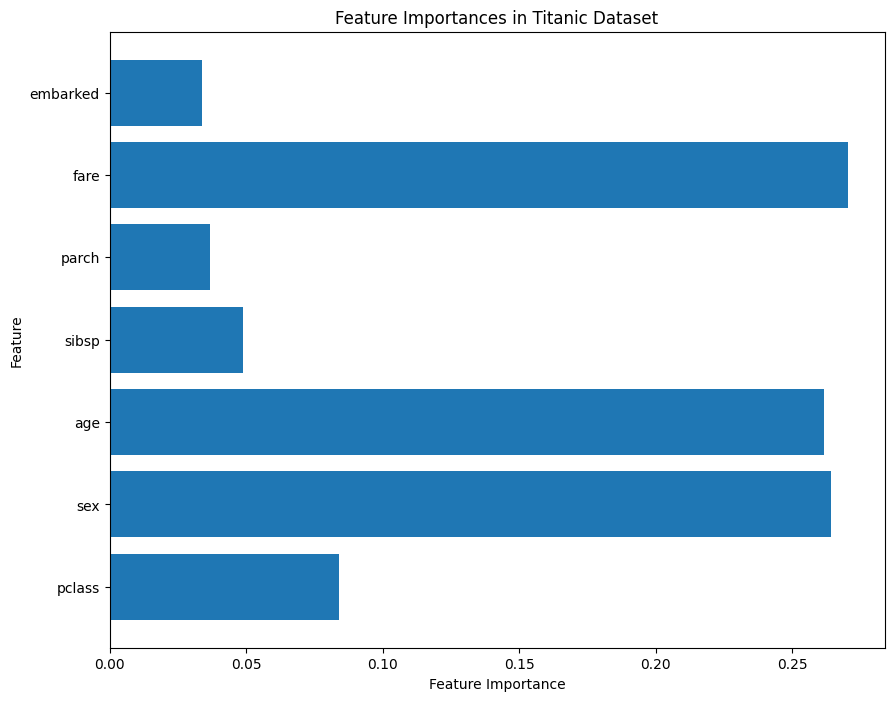

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the Titanic dataset
data = fetch_openml('titanic', version=1, as_frame=True)['frame']

# Fill missing values for numerical columns
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Fill missing values for categorical columns with the most frequent value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop columns that are not needed or have too many missing values
data.drop(['cabin', 'ticket', 'name', 'body', 'boat', 'home.dest'], axis=1, inplace=True)

# Convert categorical features to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['embarked'] = label_encoder.fit_transform(data['embarked'])

# Selecting features and target
X = data.drop('survived', axis=1)
y = data['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Titanic Dataset')
plt.show()